In [111]:
# Import necessary libraries

# pandas: Data manipulation and analysis library
# Used for loading, cleaning, and manipulating the dataset
import pandas as pd

# numpy: Numerical computing library
# Used for numerical operations and array manipulations
import numpy as np

# scikit-learn: Machine learning library
# We import several modules from scikit-learn:

# train_test_split: Function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# TfidfVectorizer: Transforms text to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# LogisticRegression: Implementation of logistic regression algorithm
from sklearn.linear_model import LogisticRegression

# GridSearchCV: Performs exhaustive search over specified parameter values for an estimator
# learning_curve: Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import GridSearchCV, learning_curve

# Various metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# nltk: Natural Language Toolkit
# Used for text preprocessing tasks
import nltk
from nltk.corpus import stopwords  # Provides a set of stopwords in various languages
from nltk.stem import PorterStemmer  # Implementation of the Porter stemming algorithm

# matplotlib: Plotting library
# Used for creating visualizations like learning curves and confusion matrices
import matplotlib.pyplot as plt

# Download necessary NLTK data
# These are required for tokenization and stopword removal
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
##### YOUR CODE STARTS HERE #####
# Load the data using pandas. Make sure the 'data.csv' file is in your working directory
# or provide the full path to the file.
# For more information on pandas, see: https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html

data =pd.read_csv('data.csv')

##### YOUR CODE ENDS HERE #####

# Display the first 5 rows of the dataset to understand its structure
print(data.head())

                                                text    sentiment
0   Enjoying a beautiful day at the park!        ...   Positive  
1   Traffic was terrible this morning.           ...   Negative  
2   Just finished an amazing workout! 💪          ...   Positive  
3   Excited about the upcoming weekend getaway!  ...   Positive  
4   Trying out a new recipe for dinner tonight.  ...   Neutral   


In [113]:
##### YOUR CODE STARTS HERE #####

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())
# Drop missing values if any
data = data.dropna()

# Check for duplicates
print("Number of duplicate rows before dropping:", data.duplicated().sum())
# Drop duplicates
data = data.drop_duplicates()

##### YOUR CODE ENDS HERE #####

Missing values in each column:
text         0
sentiment    0
dtype: int64
Number of duplicate rows before dropping: 25


In [114]:
##### YOUR CODE STARTS HERE #####

# Split the data into features (X) and target (y)
# Set the features to the text column and target to the sentiment columns
X = data['text']
y = data['sentiment']
##### YOUR CODE ENDS HERE #####

In [115]:
##### YOUR CODE STARTS HERE #####

# Split the data into training (80%) and temporary set (20%)
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the temporary set into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

##### YOUR CODE ENDS HERE #####

In [116]:
##### YOUR CODE STARTS HERE #####

# Apply the preprocess_text function to the text columns of the training, validation, and test sets
X_train = X_train.apply(preprocess_text)
X_val = X_val.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

##### YOUR CODE ENDS HERE #####

In [117]:
# TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects
# the importance of a word in a document within a collection or corpus
# For more information, see: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

##### YOUR CODE STARTS HERE #####

# Create an instance of the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the validation and test data using the fitted vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##### YOUR CODE ENDS HERE #####

In [118]:
# We use LogisticRegression for multi-class classification
# For more information, see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
##### YOUR CODE STARTS HERE #####

# Create an instance of the LogisticRegression classifier
clf = LogisticRegression(max_iter=1000)

# Fit the classifier on the training data
clf.fit(X_train_tfidf, y_train)

# Predict the sentiment on the validation set
val_predictions = clf.predict(X_val_tfidf)

# Calculate the accuracy of the model on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)


##### YOUR CODE ENDS HERE #####
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.6338028169014085


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


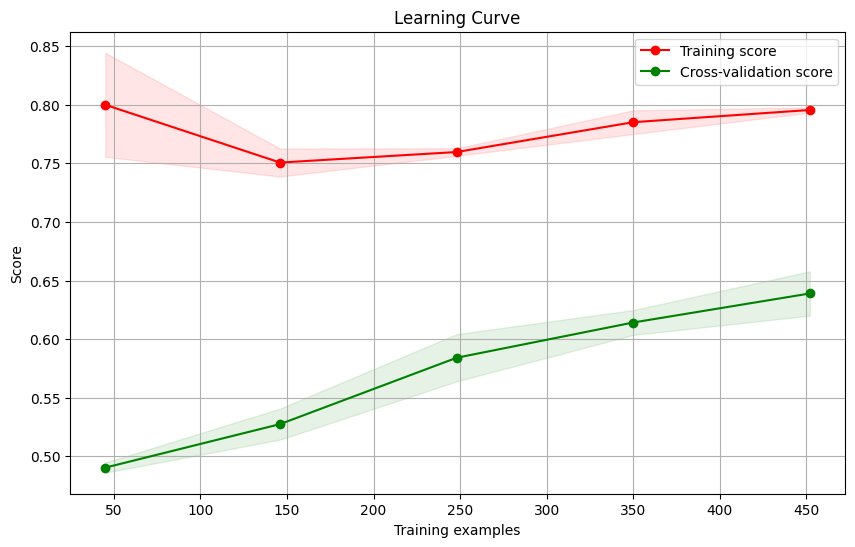

In [119]:
# plot the learning curve of the model to examine bias and variance
# Plot learning curve to assess overfitting/underfitting
def plot_learning_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


##### YOUR CODE STARTS HERE #####

# Plot the learning curve for the trained model, pass the needed parameters model, train features and train target
plot_learning_curve(clf, X_train_tfidf, y_train)

##### YOUR CODE ENDS HERE #####

Does your model suffer from overfitting (high variance) or underfitting (high bias) or neither and why?
Given the validation accuracy of 63.4%, it’s evident that the model is experiencing underfitting. This means it’s likely too simple or hasn’t been trained enough to make accurate predictions. The 25 duplicate rows in the dataset might also be playing a role in this problem. As we move forward, we’ll focus on tuning hyperparameters and exploring feature engineering to tackle these issues.

In [120]:
# use gridsearch to find the best combination of hyperparameters
# We use GridSearchCV to find the best combination of hyperparameters
# For more information, see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

##### YOUR CODE STARTS HERE #####

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2', 'elasticnet'],  # Type of regularization
    'solver': ['lbfgs', 'liblinear', 'saga']  # Algorithm to use in optimization
}

# Create an instance of the LogisticRegression classifier
clf = LogisticRegression(max_iter=1000)

# Fit the grid search to the training data
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
##### YOUR CODE ENDS HERE #####

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.7380530973451328


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

In [121]:
##### YOUR CODE STARTS HERE #####

# validate the accuracy of your best selected model
# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict the sentiment on the test set
test_predictions = best_model.predict(X_test_tfidf)

##### YOUR CODE ENDS HERE #####

# Calculate evaluation metrics
# For more information on these metrics, see: https://scikit-learn.org/stable/modules/model_evaluation.html
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='weighted')
f1 = f1_score(y_test, test_predictions, average='weighted')

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-score: {f1}")


Test Accuracy: 0.8591549295774648
Test Precision: 0.8475580757270897
Test Recall: 0.8591549295774648
Test F1-score: 0.8497540503854248


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


As a conclusion the validation accuracy of 63.4% suggested the model might be underfitting. However, after tuning the hyperparameters, we saw a significant improvement: the best cross-validation score rose to 73.8%, and the test accuracy climbed to 85.9%.

These results indicate that the model is now effectively capturing the key patterns in the data and generalizing well to unseen examples. so the  model is performing well, without signs of overfitting or underfitting.